In [52]:
import pandas as pd
import numpy as np
import copy
import time
from sklearn.cluster import KMeans
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [23]:
def process_groceries_data(file_path):
    data = pd.read_csv('Groceries_dataset.csv')
    grouped_data = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()

    pivoted_data = pd.DataFrame()
    for index, row in grouped_data.iterrows():
        new_row = {}
        new_row['transaction'] = str(row['Member_number']) + '_' + row['Date']
        for item in row['itemDescription']:
            new_row[item] = 1
        pivoted_data = pd.concat([pivoted_data, pd.DataFrame([new_row])], ignore_index=True)
    pivoted_data.fillna(0, inplace=True)
    return pivoted_data


In [24]:
data = process_groceries_data('Groceries_dataset.csv')
data_points = copy.deepcopy(data.to_numpy()[:, 1:])

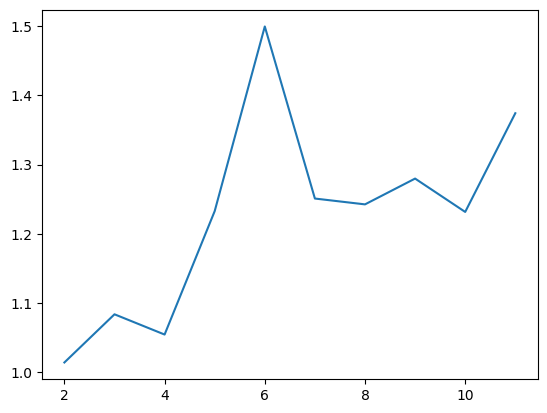

In [48]:
exec_time = []
k_ = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for k in k_:
    kmeans = KMeans(n_clusters=k, n_init=10)
    tik = time.time()
    kmeans.fit(data_points)
    exec_time.append(time.time()-tik)
plt.plot(k_, exec_time)

In [53]:
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_points)

for cluster_id in range(5):
    pts_in_cluster_count = 0
    for label in kmeans.labels_:
        if label == cluster_id:
            pts_in_cluster_count += 1
    print(pts_in_cluster_count)

similarity = distance.euclidean(kmeans.cluster_centers_[1],kmeans.cluster_centers_[0]) 

/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7915
1821
1796
2137
1294
